<a href="https://colab.research.google.com/github/NGONGOCHA/Project/blob/main/AMAZON/Random_Forest_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href = "https://www.facebook.com/tantai.trannguyen.9/" ><img src = "https://scontent.fhan2-4.fna.fbcdn.net/v/t39.30808-6/330297762_519931686881103_1442960508086897172_n.jpg?_nc_cat=111&ccb=1-7&_nc_sid=dd5e9f&_nc_ohc=fdz0cQ2nYbcAX9etvCc&_nc_ht=scontent.fhan2-4.fna&oh=00_AfCM7FTN211ubcNGJMNsSL931KUPoVjurvQaQ7UUarEaoQ&oe=65A936A9" width = 250, align = "center"></a>

#<center>**DỰ ĐOÁN NHỮNG SẢN PHẨM TỒN KHO CỦA SHOP PLAYSTATION 5 SỬ DỤNG MODEL RANDOM FOREST**

1. Sử dụng thư viện.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Đưa dữ liệu vào.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Classroom/Phân tích dữ liệu lớn/Amazon/Random Forest Amazon/amazon.csv', encoding = 'utf8')
data.head(5)

,id,links_list,title,price,rating,reviews,availability
0,1,1,1,499.0,4,115,1
1,2,2,2,499.0,4,63,1
2,3,3,3,1999.0,4,63,1
3,4,4,4,4776.0,4,47,0
4,5,5,5,7169.0,4,21,0


3. Biến hóa dữ liệu cột availability.

In [ ]:
#Biến hóa cột availability
cut_lables = ['Không còn hàng trong kho', 'Còn hàng trong kho'] #'Không còn hàng', 'còn hàng'
cut_bins = [-1, 0, 1,] #0: min, 1: max
data['PL'] = pd.cut(data['availability'], bins=cut_bins, labels=cut_lables)
data.head(5)

,id,links_list,title,price,rating,reviews,availability,PL
0,1,1,1,499.0,4,115,1,Còn hàng trong kho
1,2,2,2,499.0,4,63,1,Còn hàng trong kho
2,3,3,3,1999.0,4,63,1,Còn hàng trong kho
3,4,4,4,4776.0,4,47,0,Không còn hàng trong kho
4,5,5,5,7169.0,4,21,0,Không còn hàng trong kho


In [ ]:
#xóa cột availability
data.drop('availability', axis=1, inplace = True)
data

,id,links_list,title,price,rating,reviews,PL
0,1,1,1,499.0,4,115,Còn hàng trong kho
1,2,2,2,499.0,4,63,Còn hàng trong kho
2,3,3,3,1999.0,4,63,Còn hàng trong kho
3,4,4,4,4776.0,4,47,Không còn hàng trong kho
4,5,5,5,7169.0,4,21,Không còn hàng trong kho
...,...,...,...,...,...,...,...
300,301,301,301,324.0,3,2,Còn hàng trong kho
301,302,302,302,999.0,3,160,Còn hàng trong kho
302,303,303,303,324.0,3,1,Còn hàng trong kho
303,304,304,304,4324.0,3,9555,Còn hàng trong kho


4. Chia dữ liệu thành dữ liệu huấn luyện và kiểm tra (đào tạo sẽ dựa trên 70% dữ liệu còn 30% là dữ liệu kiểm tra).

In [ ]:
from sklearn.model_selection import train_test_split
array = data.values
X = array[:,0:6] #các cột
y = array[:,6] #nhãn/mục tiêu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train

array([[153, 153, 153, 6.0, 5, 27],
       [136, 136, 136, 787.0, 4, 61],
       [248, 248, 248, 5432.0, 5, 63],
       ...,
       [118, 118, 118, 98.0, 4, 6],
       [48, 48, 48, 6.0, 4, 4212],
       [173, 173, 173, 978.0, 5, 45]], dtype=object)

In [ ]:
y_train

array(['Còn hàng trong kho', 'Còn hàng trong kho', 'Còn hàng trong kho',
       'Còn hàng trong kho', 'Còn hàng trong kho', 'Còn hàng trong kho',
       'Còn hàng trong kho', 'Còn hàng trong kho', 'Còn hàng trong kho',
       'Còn hàng trong kho', 'Còn hàng trong kho', 'Còn hàng trong kho',
       'Còn hàng trong kho', 'Còn hàng trong kho', 'Còn hàng trong kho',
       'Còn hàng trong kho', 'Còn hàng trong kho', 'Còn hàng trong kho',
       'Không còn hàng trong kho', 'Còn hàng trong kho',
       'Còn hàng trong kho', 'Còn hàng trong kho',
       'Không còn hàng trong kho', 'Còn hàng trong kho',
       'Còn hàng trong kho', 'Còn hàng trong kho', 'Còn hàng trong kho',
       'Còn hàng trong kho', 'Còn hàng trong kho', 'Còn hàng trong kho',
       'Còn hàng trong kho', 'Còn hàng trong kho',
       'Không còn hàng trong kho', 'Còn hàng trong kho',
       'Còn hàng trong kho', 'Còn hàng trong kho', 'Còn hàng trong kho',
       'Còn hàng trong kho', 'Còn hàng trong kho', 'Còn hàng trong kho

5. Áp dụng rừng ngẫu nhiên.

In [ ]:
#Tạo rừng ngẫu nhiên

#=42 để giữ cho kết quả đào tạo mô hình được tái lặp lại và mỗi lần như vậy thì kết quả bằng nhau
random_forest = RandomForestClassifier(n_estimators=100, random_state=42) #sử dụng 100 cây
#Đào tạo rừng ngẫu nhiên dựa trên tập huấn luyện
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#precision: độ chính xác

#recall: điểm true
#f1-score: tỉ lệ điểm đánh giá
#support: hỗ trợ tỉ lệ xếp loại chính xác
predictions = random_forest.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
#Phần đánh giá mô hình phân lớp
#đường chéo ma trận là xếp loại đúng, ngoài đường chéo là sai, cộng lại và chia hết ma trận = 80%

0.9021739130434783
[[72  2]
 [ 7 11]]
                          precision    recall  f1-score   support

      Còn hàng trong kho       0.91      0.97      0.94        74
Không còn hàng trong kho       0.85      0.61      0.71        18

                accuracy                           0.90        92
               macro avg       0.88      0.79      0.83        92
            weighted avg       0.90      0.90      0.90        92



In [ ]:
#Hiển thị độ chính xác train và test

print('Độ chính xác của bộ phân loại rừng ngẫu nhiên trên dữ liệu huấn luyện là {:.2f}'.format(random_forest.score(X_train, y_train)))
print('Độ chính xác của bộ phân loại rừng ngẫu nhiên trên dữ liệu thử nghiệm là {:.2f}'.format(random_forest.score(X_test, y_test)))

Độ chính xác của bộ phân loại rừng ngẫu nhiên trên dữ liệu huấn luyện là 1.00
Độ chính xác của bộ phân loại rừng ngẫu nhiên trên dữ liệu thử nghiệm là 0.90


6. Thử nghiệm.

In [ ]:
#Xét 2 trường hợp
new_data=pd.DataFrame({'id':[1,171],'links_list':[1,171],'title':[1,171],'price':[499,87],'rating':[3,5], 'reviews':[115,17]})
new_data

,id,links_list,title,price,rating,reviews
0,1,1,1,499,3,115
1,171,171,171,87,5,17


In [ ]:
#Dự đoán 2 trường hợp đó
Du_doan = random_forest.predict(new_data)
Du_doan

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array(['Còn hàng trong kho', 'Không còn hàng trong kho'], dtype=object)

In [ ]:
#Đưa cột Du_doan vào dataframe
DT = pd.DataFrame(Du_doan, columns=['Kho'])
ket_qua = pd.concat([new_data, DT], axis=1)
ket_qua

,id,links_list,title,price,rating,reviews,Kho
0,1,1,1,499,3,115,Còn hàng trong kho
1,171,171,171,87,5,17,Không còn hàng trong kho


7. Mức độ ảnh hưởng (overfitting) của các biến đến phân loại.

In [ ]:
#Dạng số
import pandas as pd

feature = pd.Series(random_forest.feature_importances_,index=data.columns.values[0:6]).sort_values(ascending=False)
feature

id            0.266013
links_list    0.238874
title         0.225777
reviews       0.136000
price         0.117326
rating        0.016011
dtype: float64

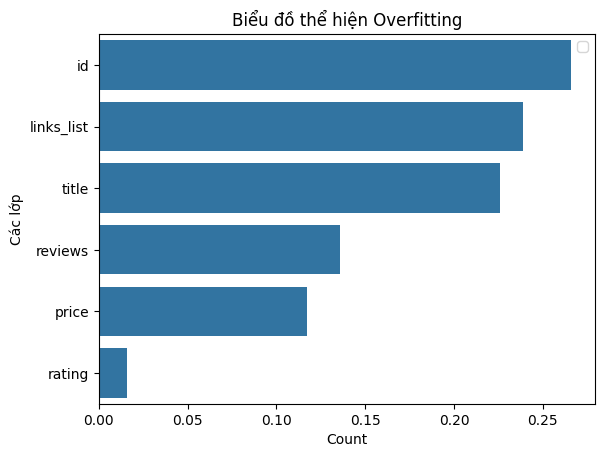

In [ ]:
#Dạng hình
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Tạo một biểu đồ thanh
sns.barplot(x=feature, y=feature.index)
#Thêm nhãn vào biểu đồ
plt.xlabel('Count')
plt.ylabel('Các lớp')
plt.title("Biểu đồ thể hiện Overfitting")
plt.legend()
plt.show()

8. Trực quan hóa rừng ngẫu nhiên.

In [ ]:
#Nhận các cột và các giá trị mục tiêu

feature=data.columns[0:6] #Nhận các feature
target=data['PL'].unique() #lấy các giá trị mục tiêu
target

['Còn hàng trong kho', 'Không còn hàng trong kho']
Categories (2, object): ['Không còn hàng trong kho' < 'Còn hàng trong kho']

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import graphviz
#xuất ra một trong các cây quyết định trong Random Forest
estimator = random_forest.estimators_[0]
#Tạo dữ liệu Dot data
dot_data = export_graphviz(estimator, filled=True,
                           rounded=True,
                           feature_names=feature,
                           class_names=target)

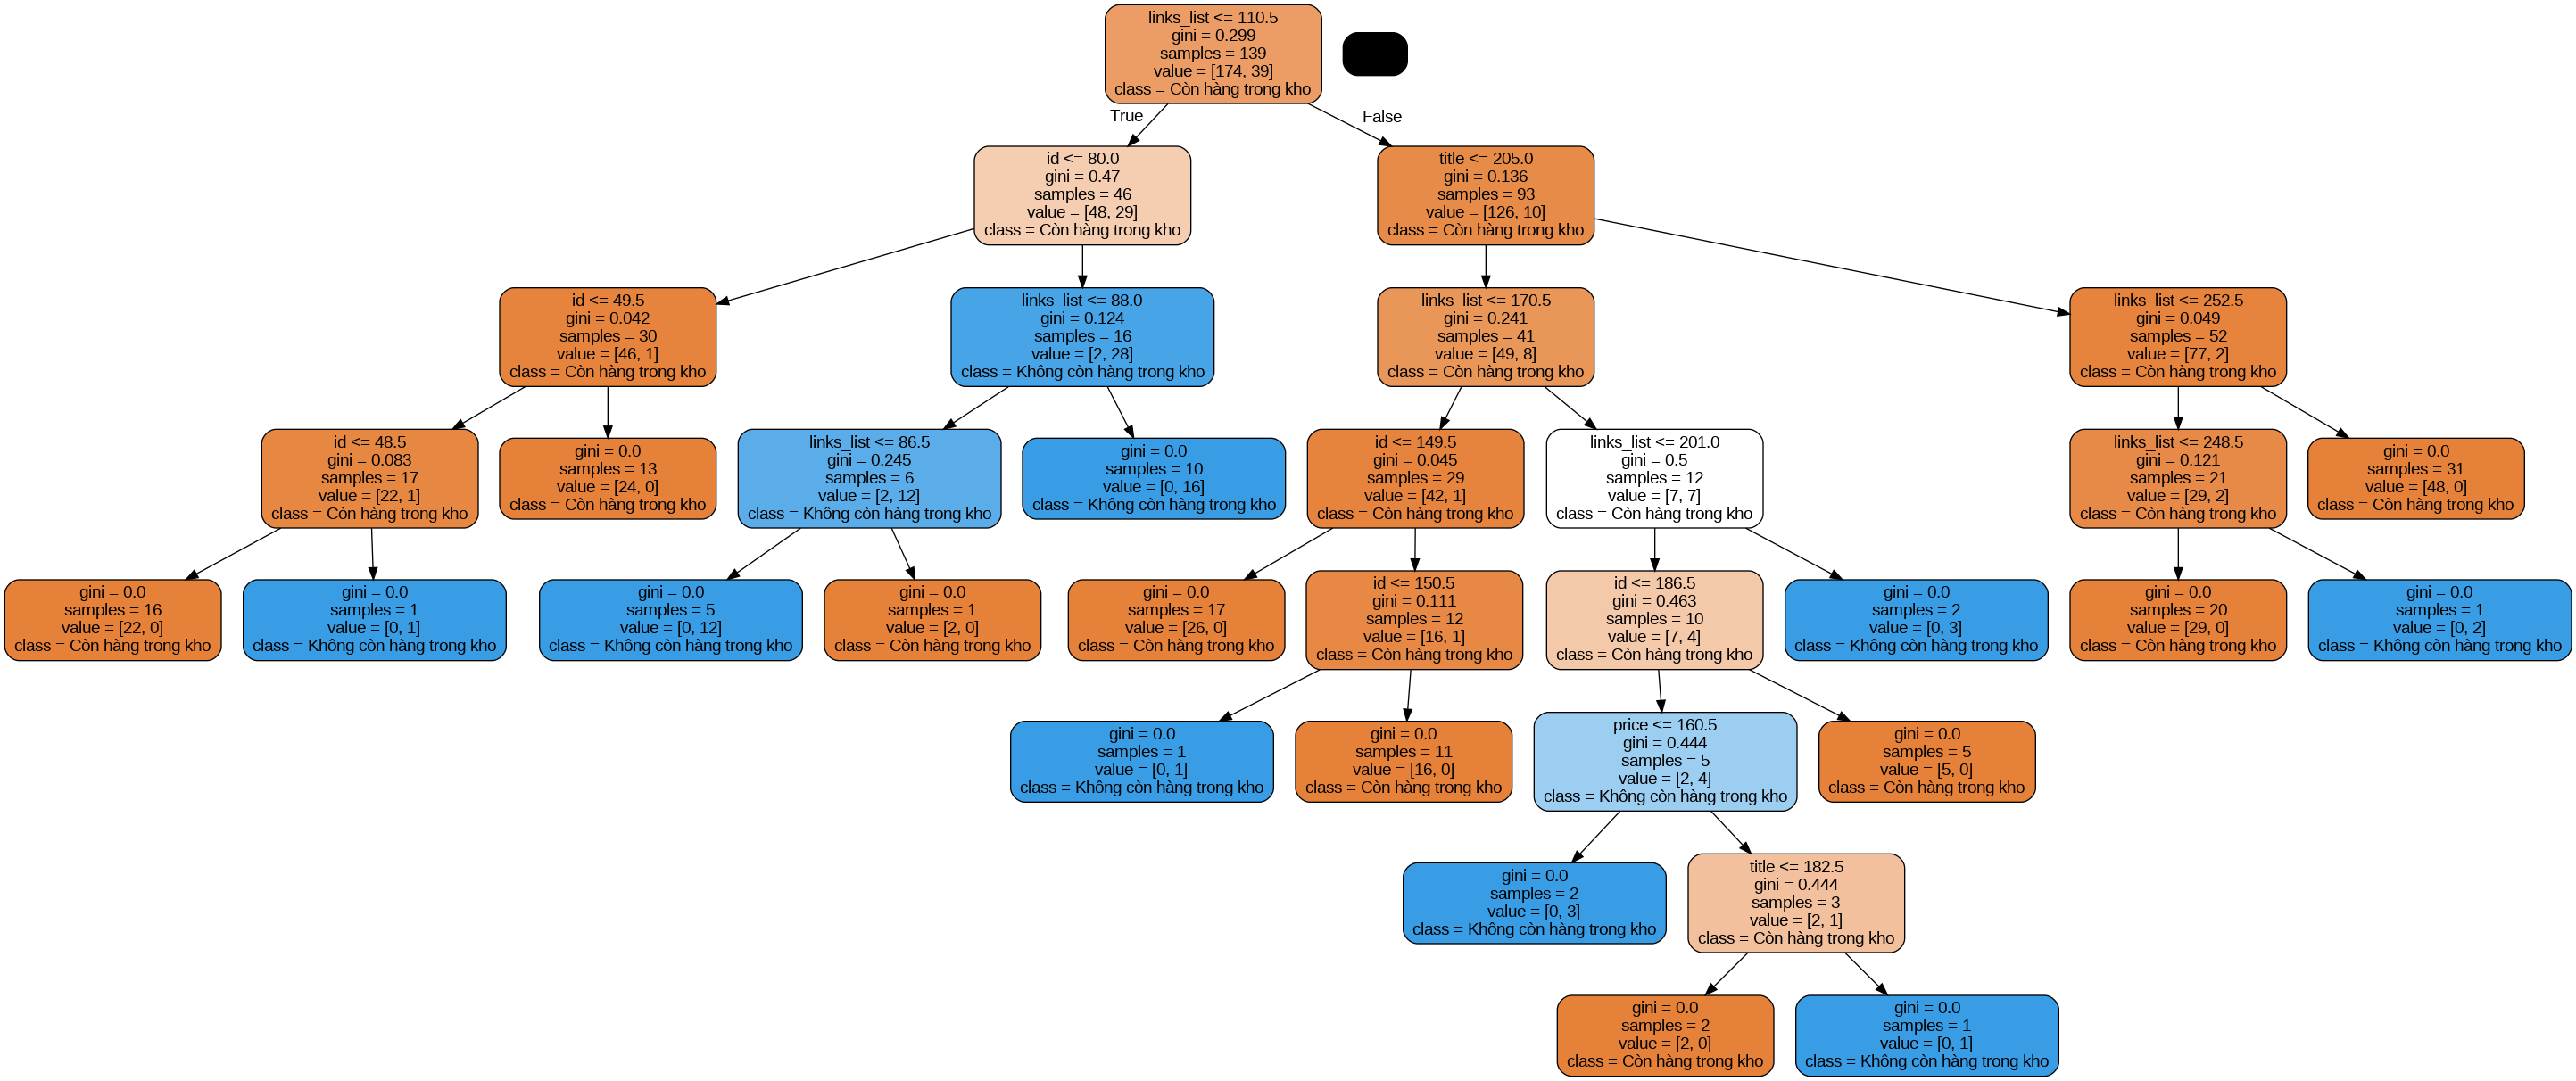

In [ ]:
#Vẽ sơ đồ rừng ngẫu nhiên
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#Tạo file PNG
graph.write_png("Random Forest_Amazon.png")

True